# Bayesian Model Mixing (BMM): Strong and weak coupling expansions

## Alexandra Semposki

### Date: 23 July 2021

In this notebook, I implement the class __Mixing__ and check to see what kind of results I can get with the orders ks = 5 and kl = 23. In the final version of this class/notebook/project, this should all be written into a package that a user can play with.

In [1]:
#import standard packages
import numpy as np
from scipy import special, integrate, stats
import math as math
import time as time
import matplotlib.pyplot as plt
%matplotlib inline

#import the class
from class_expansions import Mixing, Switching

In [2]:
#run the class initialization to make sure it works
g_true = np.linspace(1e-6, 0.5, 100)
g_data = np.linspace(0.10, 0.2, 20)
loworder = np.array([5, 10, 20])
highorder = np.array([5, 10, 20])

first = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [3]:
#call the calculations for low and high g
result_low = first.low_g(g_true, loworder)
result_high = first.high_g(g_true, highorder)

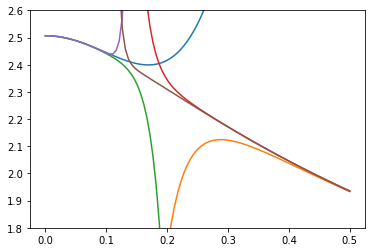

In [4]:
#checking the expansions to make sure the functions work
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(1.8,2.6)
for i in range(3):
    plt.plot(g_true, result_low[i])
    plt.plot(g_true, result_high[i])

[ 5 10 20]


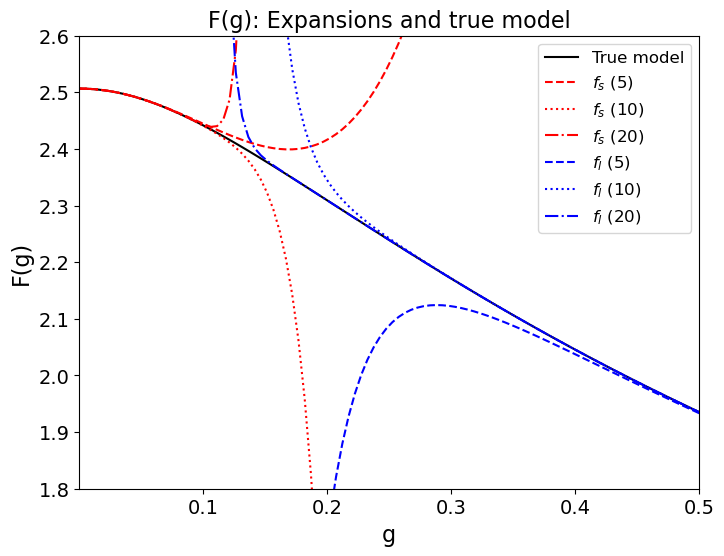

In [5]:
#running the plotting function to see how well it plots
print(loworder)
first.plot_models(g_true, loworder, highorder)

In [6]:
#now checking that multiple arrays will work
nlowk = np.array([5, 23, 50])
nhighk = np.array([5, 23, 50])

In [7]:
second = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [8]:
result_nlow = second.low_g(g_true, nlowk)

In [9]:
print(result_nlow)

[[ 2.50662827e+00  2.50643647e+00  2.50586224e+00  2.50490866e+00
   2.50358088e+00  2.50188608e+00  2.49983352e+00  2.49743449e+00
   2.49470235e+00  2.49165252e+00  2.48830246e+00  2.48467169e+00
   2.48078180e+00  2.47665641e+00  2.47232121e+00  2.46780395e+00
   2.46313441e+00  2.45834446e+00  2.45346799e+00  2.44854097e+00
   2.44360142e+00  2.43868941e+00  2.43384706e+00  2.42911856e+00
   2.42455014e+00  2.42019009e+00  2.41608876e+00  2.41229855e+00
   2.40887392e+00  2.40587137e+00  2.40334948e+00  2.40136886e+00
   2.39999219e+00  2.39928419e+00  2.39931167e+00  2.40014344e+00
   2.40185042e+00  2.40450556e+00  2.40818384e+00  2.41296235e+00
   2.41892018e+00  2.42613852e+00  2.43470058e+00  2.44469165e+00
   2.45619906e+00  2.46931220e+00  2.48412252e+00  2.50072351e+00
   2.51921074e+00  2.53968180e+00  2.56223636e+00  2.58697615e+00
   2.61400493e+00  2.64342854e+00  2.67535486e+00  2.70989383e+00
   2.74715744e+00  2.78725974e+00  2.83031684e+00  2.87644689e+00
   2.92577

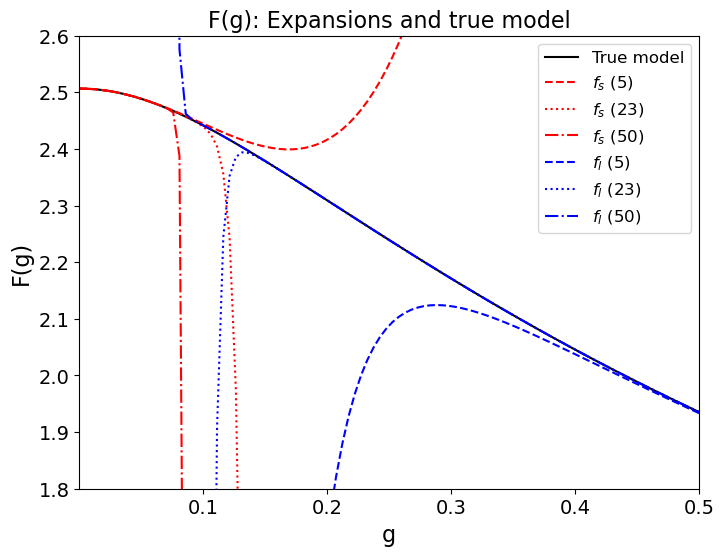

In [10]:
second.plot_models(g_true, nlowk, nhighk)

What percent error would you like on your data (please enter a decimal)?0.01


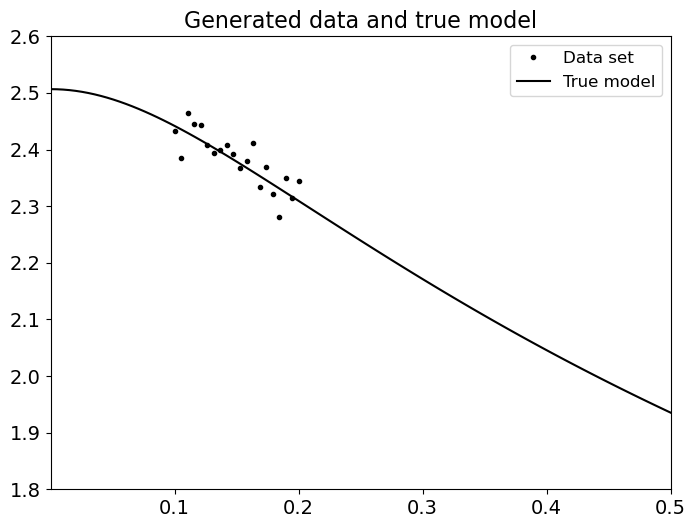

Data set:  [2.43332183 2.38579027 2.46496105 2.44543365 2.44251085 2.40796103
 2.39435849 2.39947826 2.40722691 2.39131566 2.36751005 2.37968785
 2.41174893 2.33350171 2.36944767 2.32107625 2.28021099 2.35033797
 2.3151002  2.34415921]
Standard deviations:  [0.02433322 0.0238579  0.02464961 0.02445434 0.02442511 0.02407961
 0.02394358 0.02399478 0.02407227 0.02391316 0.0236751  0.02379688
 0.02411749 0.02333502 0.02369448 0.02321076 0.02280211 0.02350338
 0.023151   0.02344159]


In [11]:
data, sigma = second.generate_data(g_true, g_data)

print('Data set: ', data)
print('Standard deviations: ', sigma)

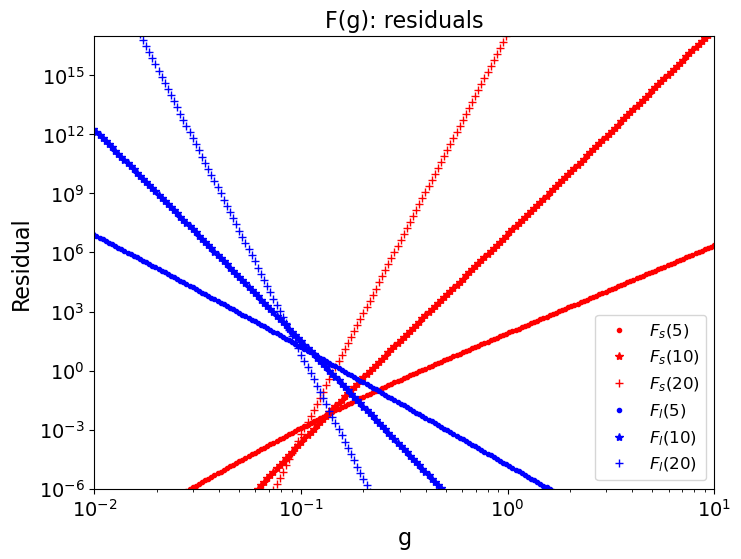

In [12]:
second.residuals(loworder, highorder)

In [13]:
#check functionality of likelihoods in the class
one = second.likelihood_low(g_data, data, sigma, loworder)
two = second.likelihood_high(g_data, data, sigma, highorder)

print('Small-g likelihoods: {} \n\nLarge-g likelihoods: {}'.format(one, two))

Small-g likelihoods: [[1.47282687e+001 1.33140637e+000 7.50566357e+000 1.31806083e+001
  1.25171841e+001 1.45765867e+001 1.11239035e+001 1.45228794e+001
  1.65517554e+001 1.40321055e+001 5.52606879e+000 1.12488857e+001
  1.46015698e+001 3.24549029e-001 7.51813504e+000 4.73609134e-002
  8.86379822e-006 1.00010741e+000 3.41112973e-003 1.47654109e-001]
 [1.55995711e+001 2.08717327e+000 5.09395994e+000 9.46352542e+000
  7.31352979e+000 1.60814486e+001 1.65075149e+001 1.11313848e+001
  2.82699552e+000 1.97651937e+000 1.64937043e+000 4.93007110e-003
  2.33186383e-010 3.60319499e-008 9.69626399e-025 5.85485362e-036
  2.77824385e-060 3.05488525e-145 1.79855978e-243 0.00000000e+000]
 [1.51711973e+001 1.34670571e+000 9.62149116e+000 1.59639642e+001
  3.45226500e+000 4.32931876e-010 3.12795208e-058 2.02428076e-277
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0

Now we want to calculate the results of the mixed model for two specific orders: a small-g expansion up to 5th order, and a large-g expansion up to 23rd order.

In [14]:
low = np.array([5])
high = np.array([23])

In [15]:
trace = second.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.16
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 33 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


In [16]:
print(trace)

[0.16914546 0.16914546 0.16914546 ... 0.16610644 0.16610644 0.16766621]


In [17]:
#print the mean of the trace
mean_g3 = np.mean(trace.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = second.credible_intervals(trace, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

Mean of g3: 0.1560830734726324
Credible interval, g3: [0.13775252 0.17357986]


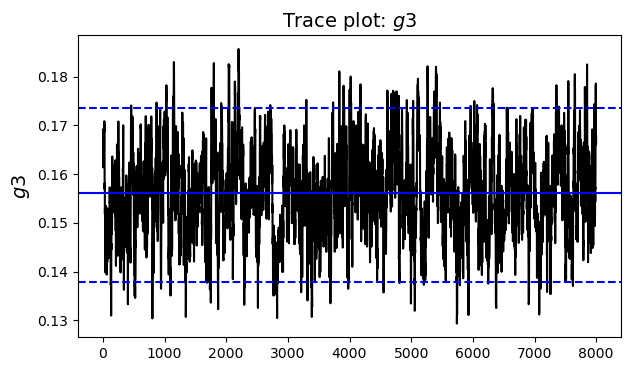

In [18]:
#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')

In [19]:
g_ppd = np.linspace(1e-6, 0.5, 100)

In [20]:
#calculate the ppd with intervals
switch_results_ppd = second.ppd_cos(0.10, 0.20, trace, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = second.credible_intervals(switch_results_ppd[i,:], 0.95)

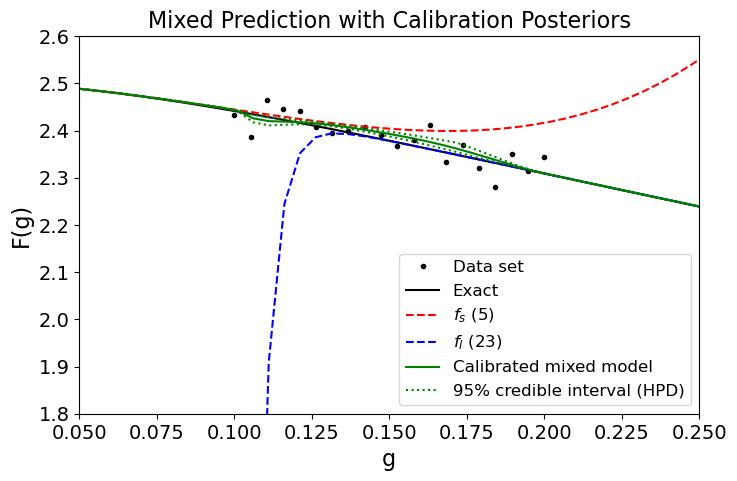

In [24]:
#plot the mean and credible intervals of the PPD against the true model and expansions
fig = plt.figure(figsize=(8,5), dpi=100)
ax = plt.axes()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('g', fontsize=16)
ax.set_ylabel('F(g)', fontsize=16)
ax.set_title('Mixed Prediction with Calibration Posteriors', fontsize=16)
ax.set_xlim(0.05, 0.25)
ax.set_ylim(1.8,2.6)
ax.plot(g_data, data, 'k.', label='Data set')
ax.plot(g_true, second.true_model(g_true), 'k', label='Exact')
ax.plot(g_true, second.low_g(g_true, low)[0,:], 'r--', label=r'$f_s$ ({})'.format(low[0]))
ax.plot(g_true, second.high_g(g_true, high)[0,:], 'b--', label=r'$f_l$ ({})'.format(high[0]))
ax.plot(g_ppd, switch_mean_results, 'g', label='Calibrated mixed model')
ax.plot(g_ppd, switch_g_intervals[:,0], 'g', linestyle='dotted', label='95% credible interval (HPD)')
ax.plot(g_ppd, switch_g_intervals[:, 1], 'g', linestyle='dotted')
plt.legend(fontsize=12)
#plt.savefig('class_produced_ppd_fs5_fl23.png')
plt.show()

The above plot looks pretty good! Now on to changing things up and writing a plotting function!